In [1]:
import pandas as ps
import numpy as pn
import seaborn as sns
import matplotlib.pyplot as mt
%matplotlib inline

In [2]:
fd=ps.read_csv(r"C:\Users\Harshit\Downloads\patient.csv")
fd.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [3]:
fd.shape

(5328, 14)

In [4]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5328 non-null   int64  
 1   sex               383 non-null    object 
 2   birth_year        370 non-null    float64
 3   country           5328 non-null   object 
 4   region            371 non-null    object 
 5   group             81 non-null     object 
 6   infection_reason  140 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       70 non-null     float64
 9   contact_number    47 non-null     float64
 10  confirmed_date    5328 non-null   object 
 11  released_date     32 non-null     object 
 12  deceased_date     20 non-null     object 
 13  state             5328 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 582.9+ KB


In [5]:
fd.isnull().sum()/len(fd)*100

id                   0.000000
sex                 92.811562
birth_year          93.055556
country              0.000000
region              93.036787
group               98.479730
infection_reason    97.372372
infection_order     99.343093
infected_by         98.686186
contact_number      99.117868
confirmed_date       0.000000
released_date       99.399399
deceased_date       99.624625
state                0.000000
dtype: float64

In [6]:
fd.duplicated().sum()  #Removing duplicates if any
fd.drop_duplicates(inplace=True)

In [7]:
# Assuming 'fd' is your DataFrame, you can select only the numeric columns like this:
numeric_columns = fd.select_dtypes(include=['number'])

# Then, calculate the correlation on the numeric columns:
correlation_matrix = numeric_columns.corr()

In [8]:
correlation_matrix

,id,birth_year,infection_order,infected_by,contact_number
id,1.000000,0.063767,0.687961,0.721973,-0.138705
birth_year,0.063767,1.000000,-0.570969,0.092937,-0.164640
infection_order,0.687961,-0.570969,1.000000,0.575657,-0.096180
infected_by,0.721973,0.092937,0.575657,1.000000,0.057415
contact_number,-0.138705,-0.164640,-0.096180,0.057415,1.000000


In [9]:
fd.isnull().sum()

id                     0
sex                 4945
birth_year          4958
country                0
region              4957
group               5247
infection_reason    5188
infection_order     5293
infected_by         5258
contact_number      5281
confirmed_date         0
released_date       5296
deceased_date       5308
state                  0
dtype: int64

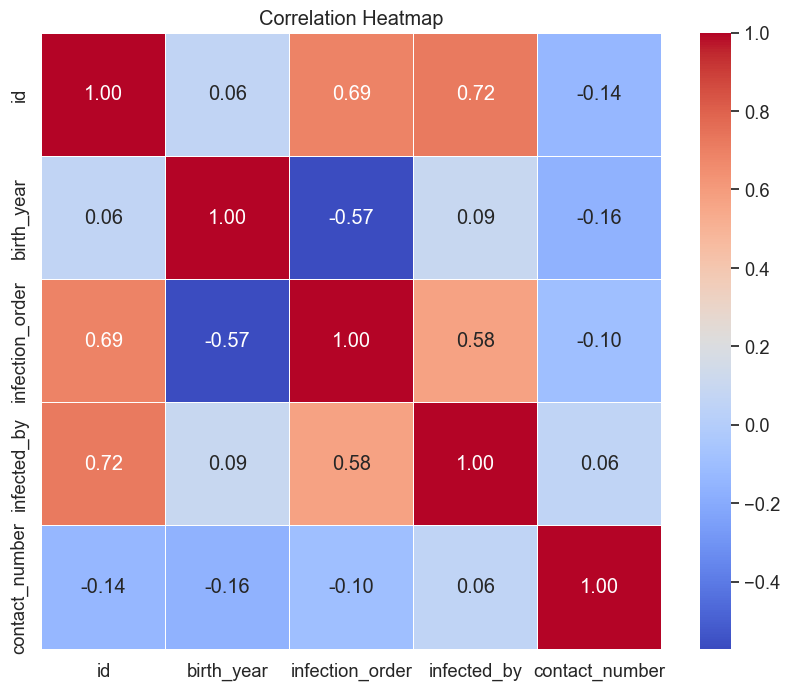

In [10]:
# Set the size of the heatmap
mt.figure(figsize=(10, 8))

# Customize the heatmap style
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
mt.title("Correlation Heatmap")

# Show the heatmap
mt.show()

In [11]:
fd.columns

Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [12]:
fd["sex"].value_counts()

female    194
male      189
Name: sex, dtype: int64

In [13]:
fd.sex = fd.sex.apply(lambda X : 0 if X == 'female' else 1) #applying lambda function to change sex Female & Male to 0 & 1
fd.head(5)

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,0,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,1,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,1,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,1,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,1,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [14]:
fd.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5328.0,2664.500000,1538.205448,1.0,1332.75,2664.5,3996.25,5328.0
sex,5328.0,0.963589,0.187329,0.0,1.00,1.0,1.00,1.0
birth_year,370.0,1973.589189,17.560546,1932.0,1960.00,1974.0,1987.75,2018.0
infection_order,35.0,2.285714,1.405272,1.0,1.00,2.0,3.00,6.0
infected_by,70.0,379.000000,540.247528,3.0,29.25,126.0,563.25,2621.0
contact_number,47.0,72.978723,188.155288,0.0,2.50,16.0,46.00,1160.0


<Axes: >

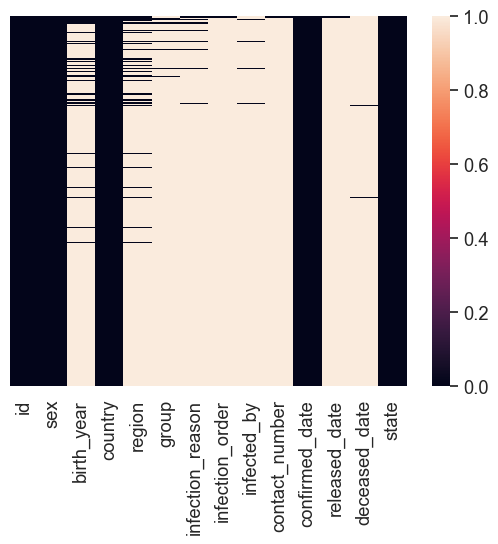

In [15]:
sns.heatmap(fd.isnull(), yticklabels = False)  #checking NULl Values via graph,where you can find yellow colour which m

Text(0.5, 1.0, 'Regions affected Overall')

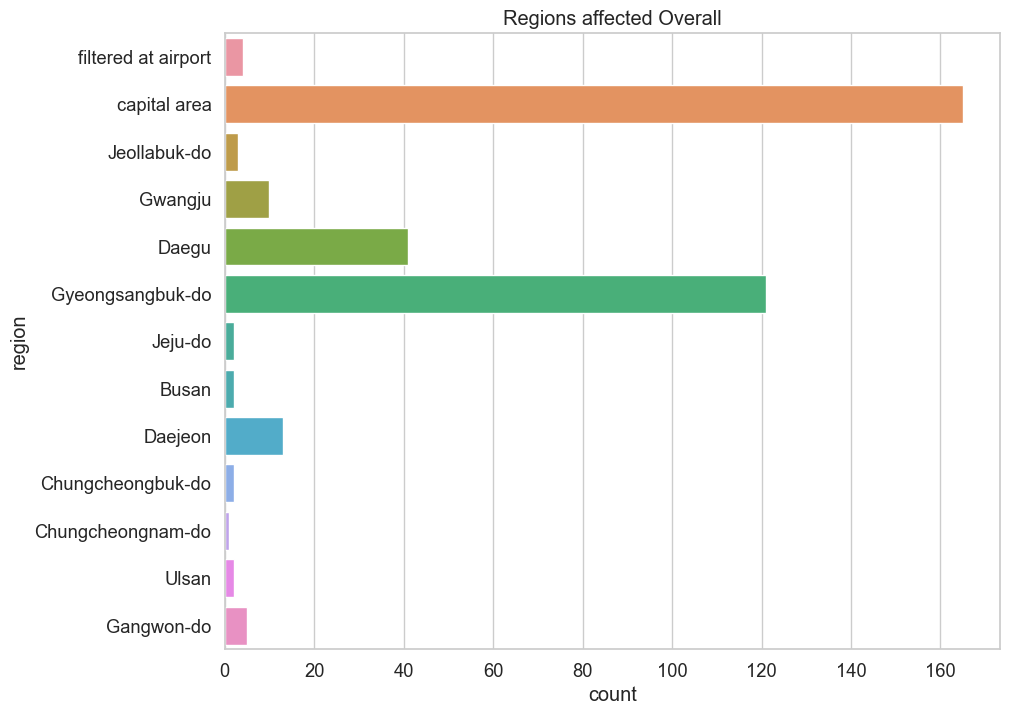

In [16]:
mt.figure(figsize=(10,8))
sns.countplot(y=fd['region'],).set_title('Regions affected Overall') # Ploting graph which regions maximum number of affe

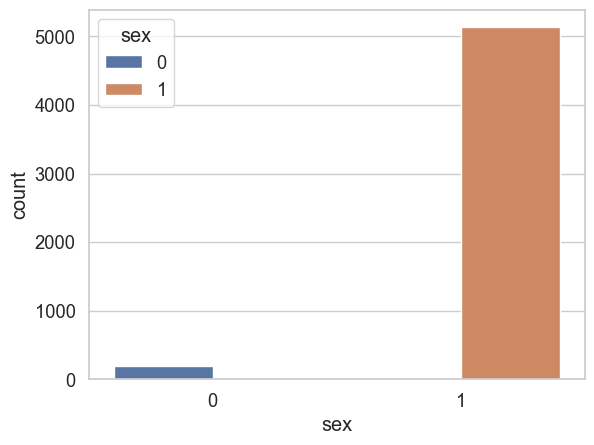

In [17]:
sns.countplot(x='sex',data=fd, hue='sex');  # sex Female & Male to 0 & 

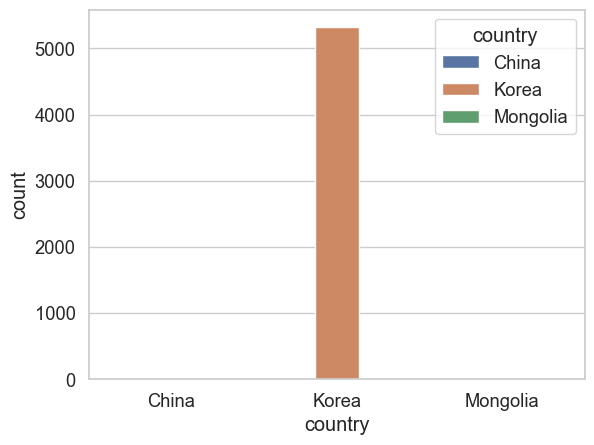

In [18]:
sns.countplot(x='country',data=fd, hue='country');  # Ploting Graph which Country maximum number of affected people. 

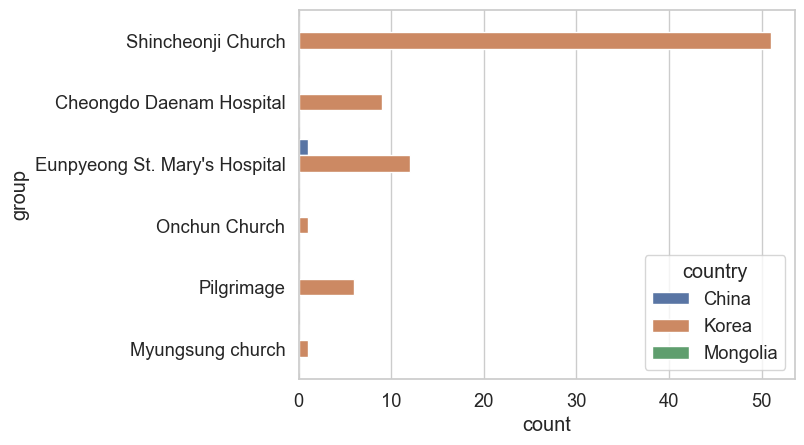

In [19]:
sns.countplot(y='group',data=fd, hue='country');  # Ploting Graph which area maximum number of affected people in country. 

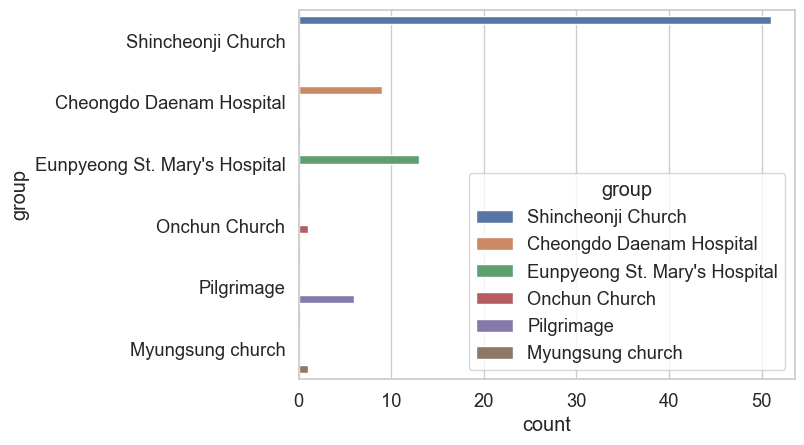

In [20]:
sns.countplot(y='group',data=fd, hue='group');

In [21]:
# confirmed patients trend

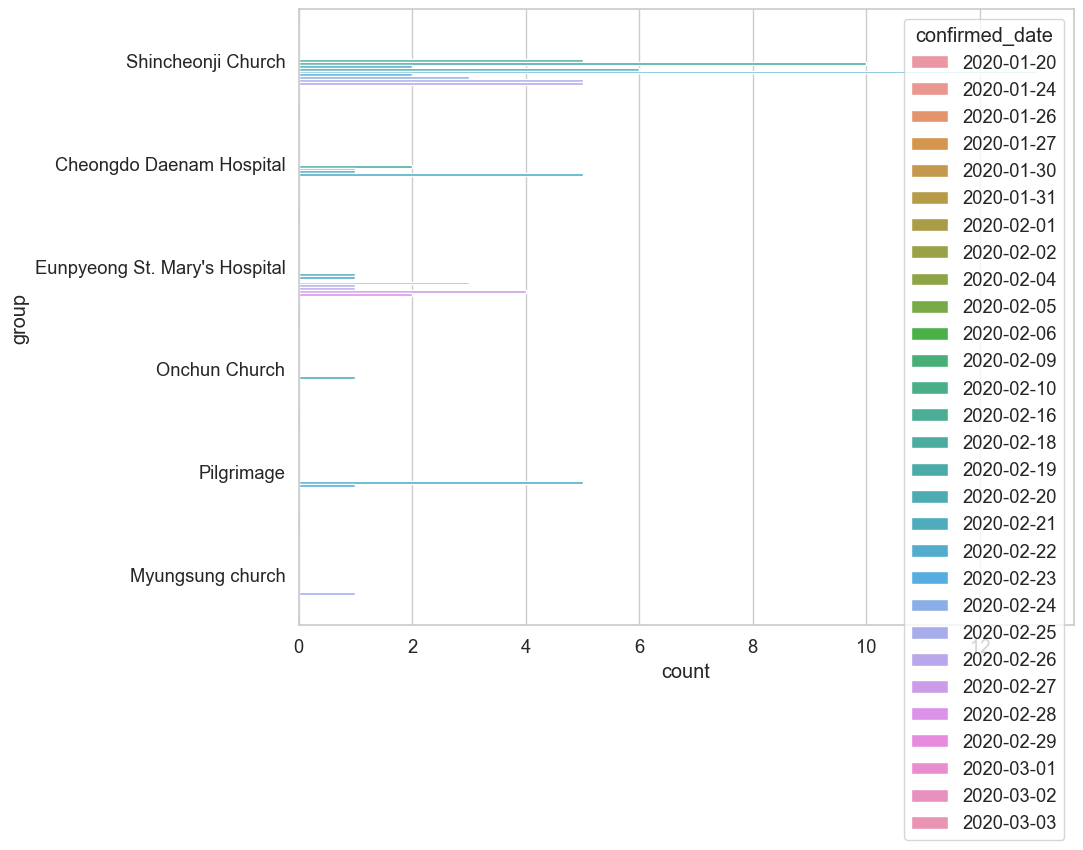

In [22]:
mt.figure(figsize=(10,8))
sns.countplot(y='group',data=fd, hue='confirmed_date'); 

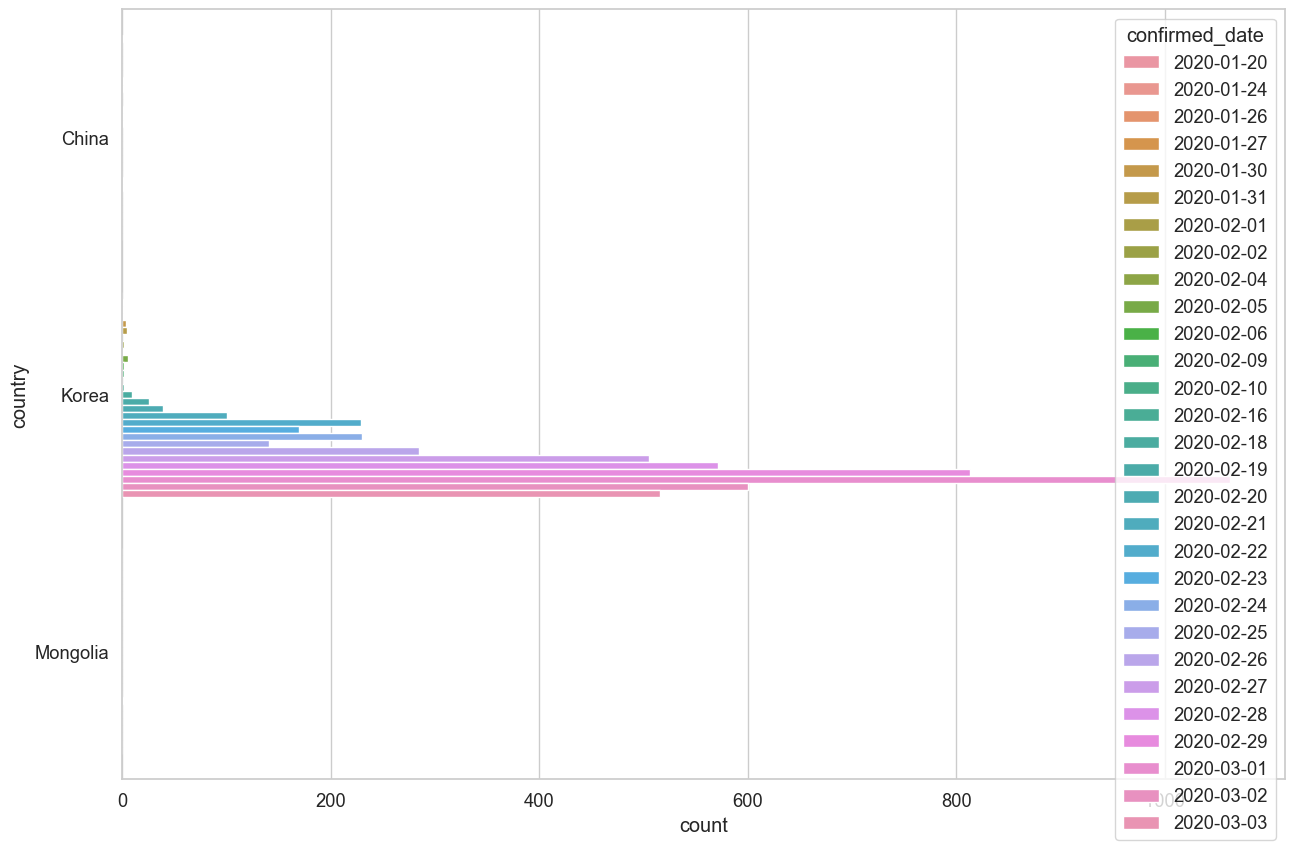

In [23]:
mt.figure(figsize=(15,10))
sns.countplot(y='country',data=fd, hue='confirmed_date');
# sns.countplot(y=data['confirmed_date'].loc[(data['country']=="Korea")],).set_titl

Text(0.5, 1.0, 'Confirmed dates in Korea')

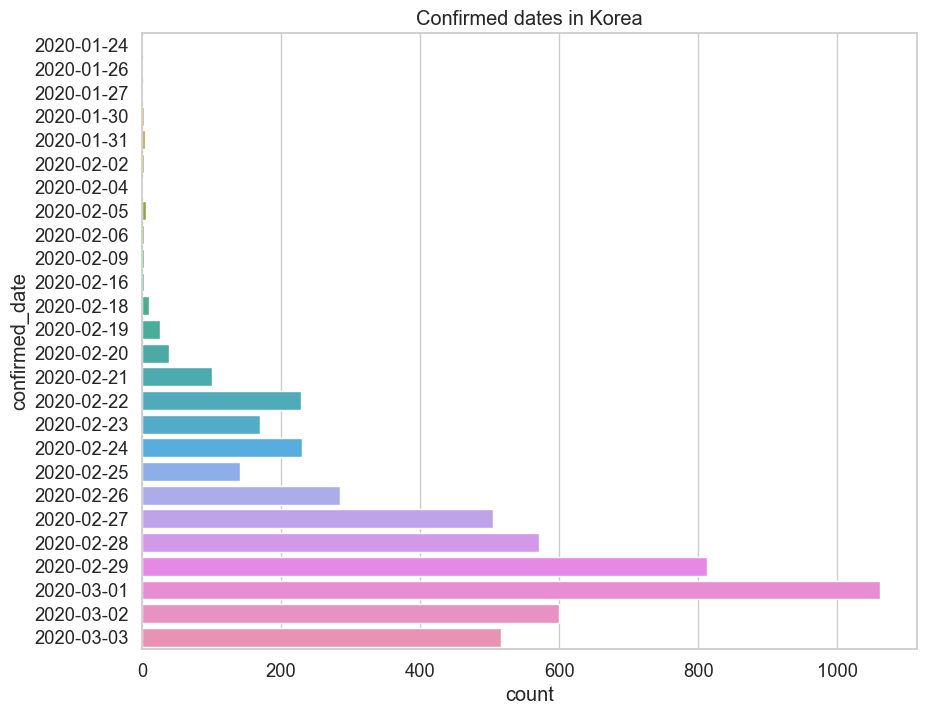

In [24]:
mt.figure(figsize=(10,8))
sns.countplot(y=fd['confirmed_date'].loc[(fd['country']=="Korea")],).set_title('Confirmed dates in Korea')  
# ploting the graph confirmed date of the human infected or not in the Korea Country

Text(0.5, 1.0, 'Confirmed dates in China')

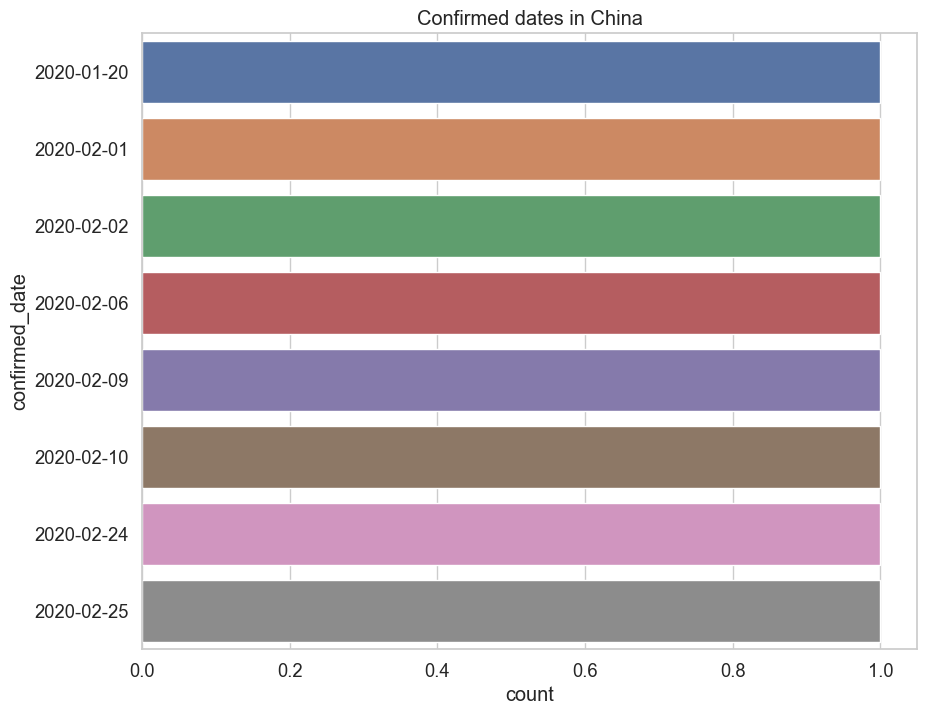

In [25]:
mt.figure(figsize=(10,8))
sns.countplot(y=fd['confirmed_date'].loc[(fd['country']=="China")],).set_title('Confirmed dates in China')
# ploting the graph confirmed date of the human infected or not in the China Coun

Text(0.5, 1.0, 'Confirmed dates in Mongloia')

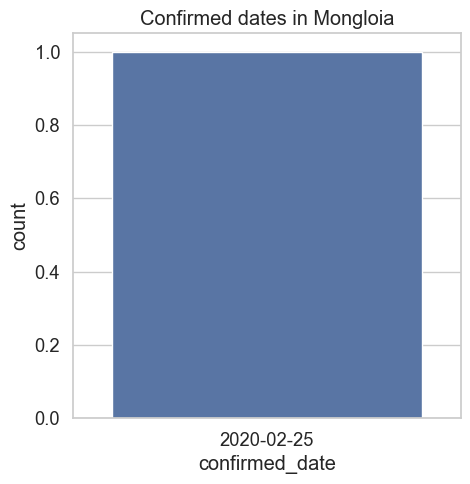

In [26]:
mt.figure(figsize=(5,5))
sns.countplot(x=fd['confirmed_date'].loc[(fd['country']=="Mongolia")],).set_title('Confirmed dates in Mongloia')
# ploting the graph confirmed date of the human infected or not in the Mongloia Country

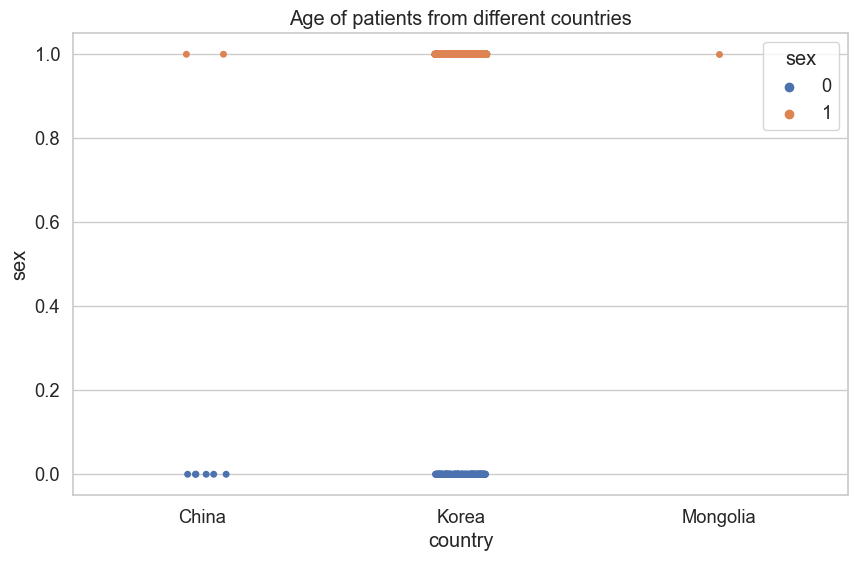

In [27]:
mt.figure(figsize=(10,6))
sns.stripplot(x=fd.country, y=fd.sex, hue=fd.sex)
mt.title("Age of patients from different countries")
mt.show()

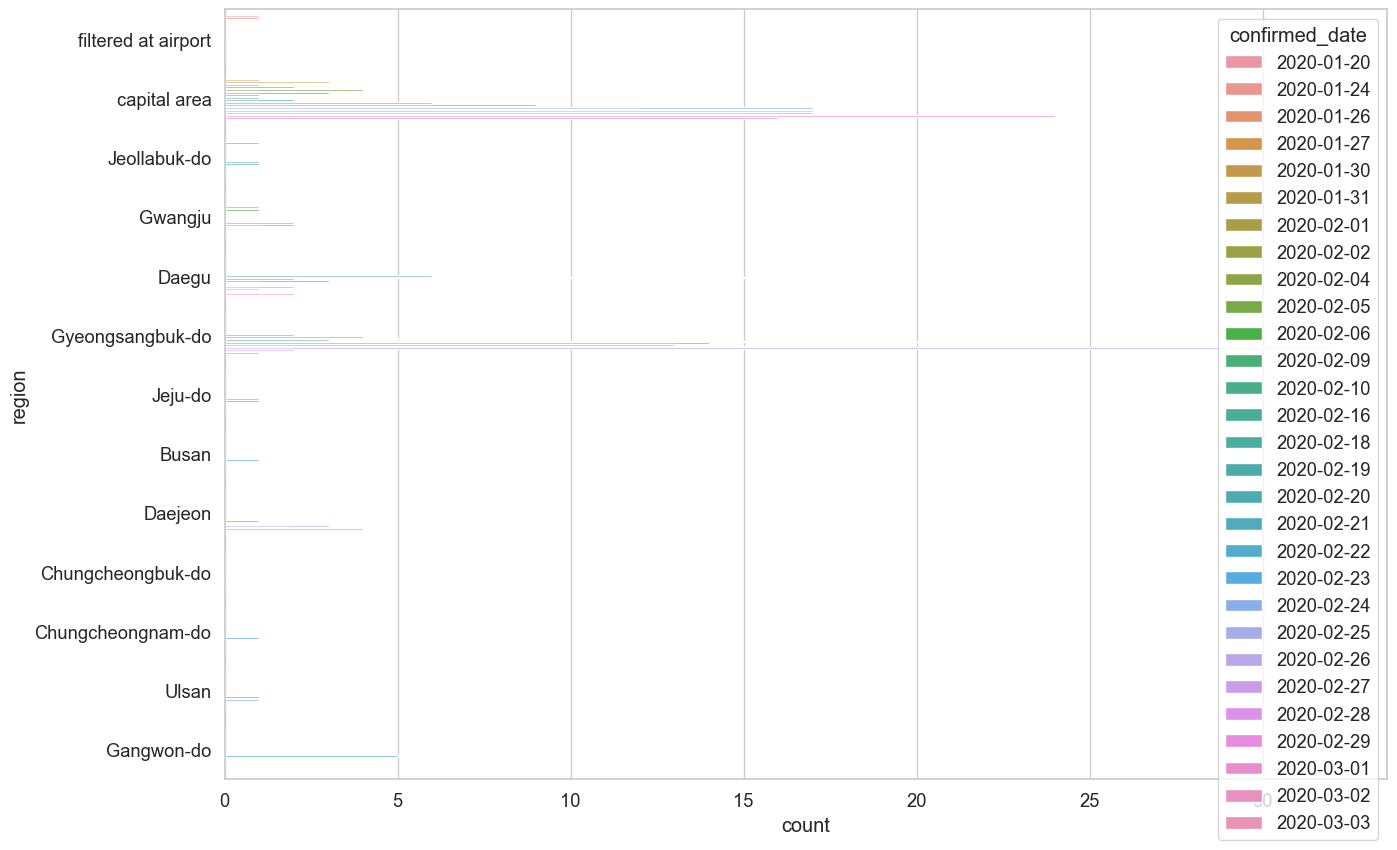

In [28]:
mt.figure(figsize=(15,10))
sns.countplot(y='region',data=fd, hue='confirmed_date');

<Axes: >

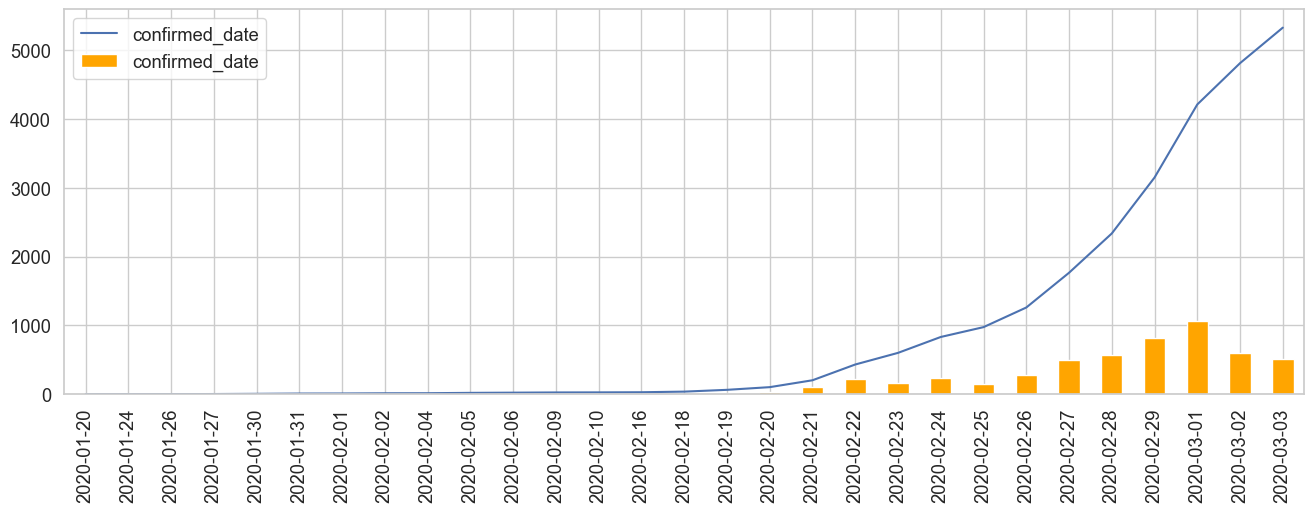

In [29]:
confirmed_patients_series = fd['confirmed_date'].value_counts().sort_index()

confirmed_patients_series.cumsum().plot(legend='accumulated')
confirmed_patients_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

<Axes: >

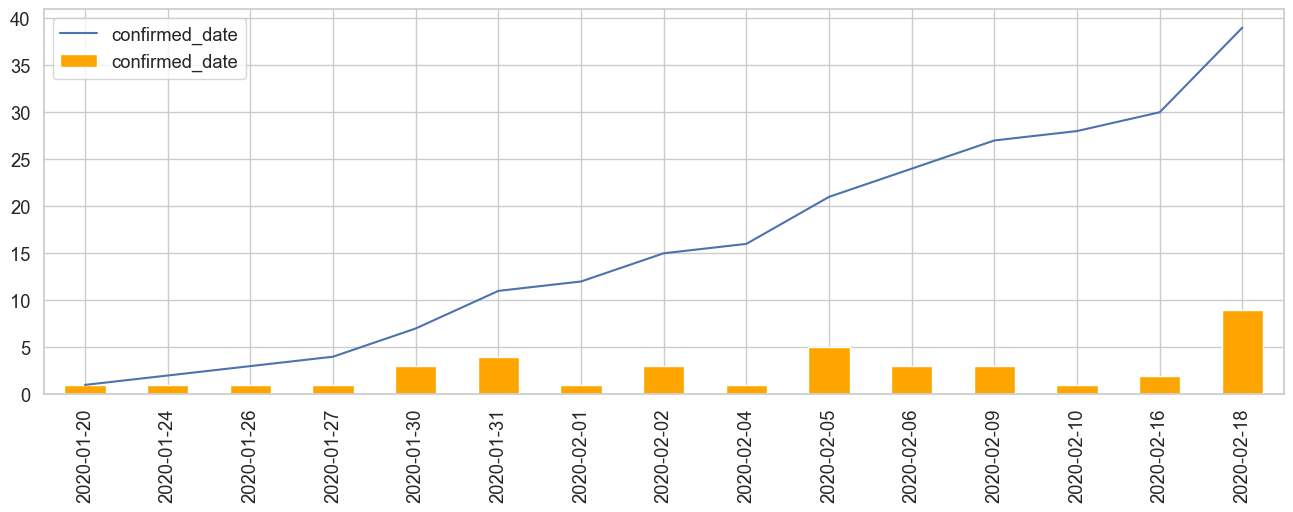

In [30]:
# before no.31 patient confirmed
limit_series = confirmed_patients_series[:fd[fd['id'] == 31]['confirmed_date'].values[0]]
limit_series.cumsum().plot(legend='accumulated')
limit_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

<Axes: >

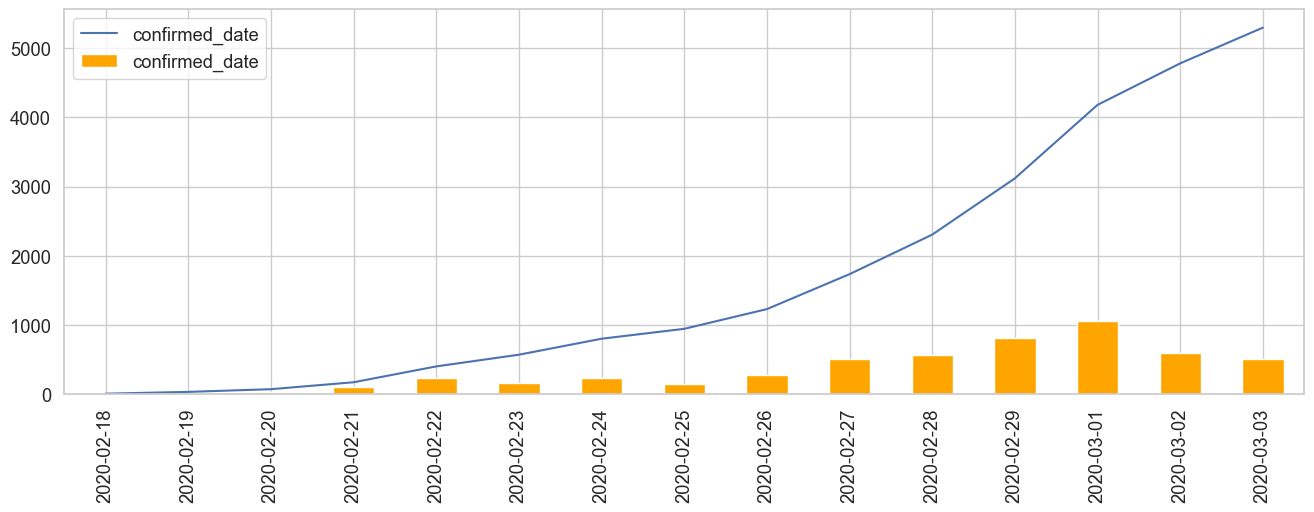

In [33]:
# after no.31 patient confirmed
limit_series = confirmed_patients_series[fd[fd['id'] == 31]['confirmed_date'].values[0]:]
limit_series.cumsum().plot(legend='accumulated')
limit_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

<Axes: xlabel='state', ylabel='count'>

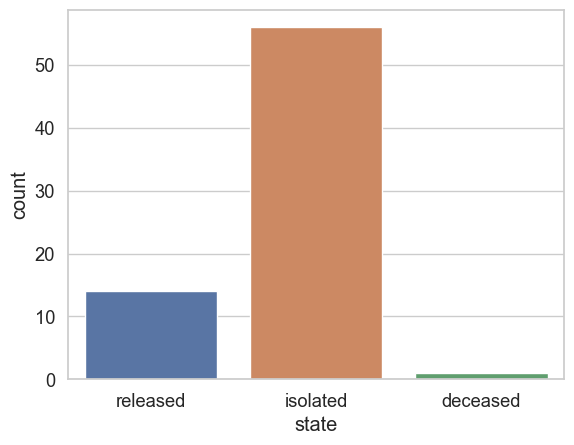

In [34]:
sns.countplot(x=fd['state'].loc[(fd['infection_reason']=='contact with patient')])

In [35]:
!pip install WordCloud
from wordcloud import WordCloud

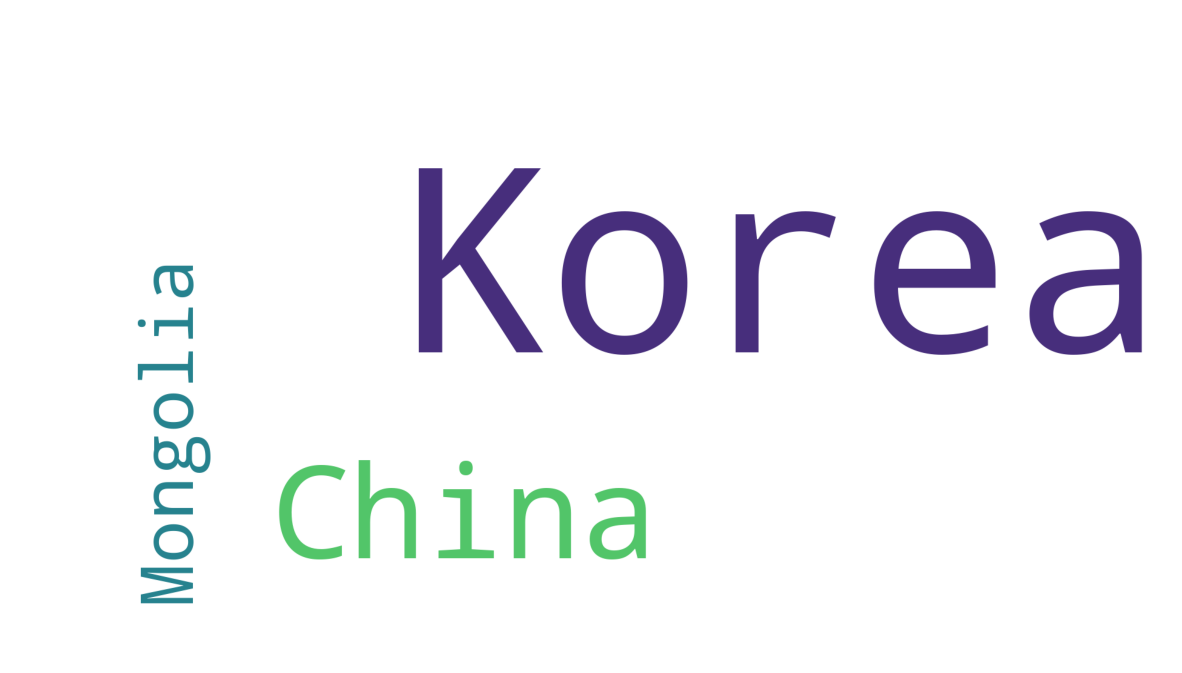

In [37]:
import matplotlib.pyplot as mt
mt.subplots(figsize=(15,15)) #Using WordCloud to check most frequently country suffered from "Coronavirus" 
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(fd.country))
mt.imshow(wordcloud)
mt.axis('off')
mt.savefig('country.png')
mt.show()